In [1]:
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
from impy.definitions import *
from impy.constants import *
from impy.kinematics import EventKinematics
from impy import impy_config, pdata

In [3]:
impy_config["user_frame"] = 'center-of-mass'
impy_config['tau_stable'] = 10e-12
impy_config['pi0_stable'] = True
impy_config['debug_level'] = 2

In [4]:
event_kinematics = EventKinematics(
    ecm= 14000 * GeV,
    p1pdg=2212,
    p2pdg=2212
)

generator = make_generator_instance(interaction_model_by_tag['DPMJETIII191'])
generator.init_generator(event_kinematics)

impy.models.dpmjetIII.DpmjetIIIRun::init_generator(): Initializing DPMJET-III


In [5]:
n_bins = 30
bins = np.linspace(-10,10,n_bins+1)
grid = 0.5*(bins[1:] + bins[:-1])
widths = (bins[1:] - bins[:-1])
piplus = np.zeros(n_bins)
piminus = np.zeros(n_bins)

n_events = 50000
norm = 1./float(n_events)/widths

# This
for event in generator.event_generator(event_kinematics, n_events):
    event.filter_final_state_charged()
    piplus += norm*np.histogram(event.eta[event.id == 211],bins=bins)[0]
    piminus += norm*np.histogram(event.eta[event.id == -211],bins=bins)[0]

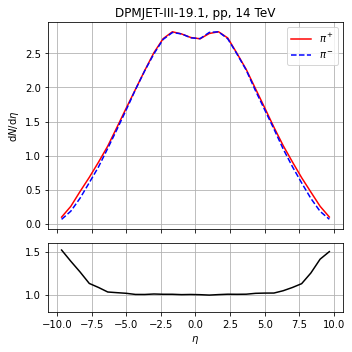

In [8]:
fig, axes = plt.subplots(2,1, gridspec_kw={'height_ratios': [3, 1]},sharex=True, figsize=(5,5))
axes[0].set_title(r'DPMJET-III-19.1, pp, 14 TeV')
axes[0].plot(grid, piplus, color='r', label=r'$\pi^+$')
axes[0].plot(grid, piminus, color='b', ls='--',label=r'$\pi^-$')
axes[0].set_ylabel(r'd$N$/d$\eta$')
axes[0].legend()
axes[0].grid()
axes[1].plot(grid, piplus/piminus, color='k')
axes[1].set_ylim(.8,1.6)
axes[1].set_xlabel(r'$\eta$')
axes[1].grid()
plt.tight_layout()

plt.savefig('pp_14_TeV_pions.png',dpi=200)
# plt.ylim(1e-2,)
# plt.semilogy()
